In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [9]:
def gera_matriz(num_matriz, n):
    """ 
    Retorna as matrizes que serão utilizadas pelo algoritmo
    
    Parameters
    -------------
    num_matriz : int
        Um inteiro (1 ou 2), que representa qual o formato da matriz que deve ser retornada
    
    n : int
        Um inteiro que é a dimensão da matriz que deve ser retornada
    
    Returns
    -------------
    A : np.array
        Caso num_matriz seja 1, retorna um np.array de dimensão nxn que 
        representa a matriz que será utilizada na simulação,
        caso num_matriz seja 2, retornará as duas matrizes de dimensões nxn
        que serão utilizadas na simulação.
    """
    
    B = np.random.random_sample((n,n))
    A = np.zeros((n, n))
    if num_matriz == 1:
        A = B+B.T
        return A
        
    else:
        autovalores_1 = [-10.71, -12.64, 14.86,   4.07, -11.29,- 3.05, 10.12,  3.51, - 6.35, -13.02] #autovalores próximos
        autovalores_2 = [- 1.53, - 9.26, 18.75, -13.88, - 5.41, 10.77, 12.31, -9.78,  11.35,  10.92] # autovalores distantes
        D_1 = np.diag(np.array(autovalores_1)[:n])
        D_2 = np.diag(np.array(autovalores_2)[:n])
        B_inv = np.linalg.inv(B)
        A_1 = B @ D_1 @ B_inv
        A_2 = B @ D_2 @ B_inv
        return A_1, A_2

In [10]:
class MetodoDasPotencias:
    """
    Uma classe usada para representar o método das potências,
    que é utilizado para calcular o maior autovetor e autovalor
    da matriz A  
    
    ...
    Attributes
    ------------
    x : list
        uma lista contendo todos os valores assumidos 
        por x durante a execução do algoritmo
        
    mi : list
        uma lista contendo todos os valores assumidos 
        por mi durante a execução do algoritmo
        
    A : np.array
        a matriz sobre a qual sera aplicada o método
        das potências
    
    n : int
        um inteiro que representa a dimensão da matriz 
        quadrada A
        
    it_max : int
        número de iterações máximas do algoritmo
        
    eps: float
        diferença entre o valor obtido e o valor tabelado
        a partir da qual pode-se parar a simulação
        
    erro_autovalor : list
        lista que armazena o erro entre o autovalor 
        calculado e o tabelado
        
    erro_autovetor : list
        lista que armazena o erro entre o autovetor
        calculado e o tabelado
        
    lambda_1 : float
        maior autovalor da matriz A calculado utilizando
        a biblioteca np.linalg.eig, que serve como valor 
        tabelado para calcular o erro
        
    x_estrela : np.array
        autovetor associado ao lambda_1, calculado utilizando
        a biblioteca np.linalg.eig, que serve como o
        autovetor tabelado para calcular o erro
        
    
    Methods
    -----------
    _calcula_mi()
        Calcula o mi de acordo com o método das potências
        
    _calcula_x()
        Calcula o x de acordo com o método das potências
        
    _calcula_erros()
        Calcula os erros do autovetor e do autovalor
        utilizando os valores calculados
        
    calcula_aproximacao()
        Executa as iterações até chegar em uma solução 
        para o autovetor que convirja para a solução
        tabelada
        
    gera_grafico_comparativo(titulo, savefig=False, filename="")
        Função que gera o gráfico comparativo para as ordens de
        convergência.
        
    """
    def __init__(self, A, it_max, eps):
        self.x = []
        self.mi = []
        self.n = A.shape[0]
        self.A = A
        self.it_max = it_max
        self.eps = eps
        
        #obtem os autovalores e autovetores de A
        autovalores, autovetores = np.linalg.eig(A)
        
        #salva os indices dos dois maiores autovalores
        A_argsort = np.argsort(np.abs(autovalores), axis=0)
        id_max_1 = A_argsort[-1]
        id_max_2 = A_argsort[-2]
        
        #pega os valores dos dois maiores autovetores
        lambda_1 = autovalores[id_max_1]
        lambda_2 = autovalores[id_max_2]
        
        #pega o autovetor correspondente ao maior autovalor
        x_estrela = autovetores.T[id_max_1]
        
        self.lambda_1 = lambda_1
        self.lambda_2 = lambda_2
        self.eta = abs(lambda_2/lambda_1)
        self.x_estrela = x_estrela
        
        self.erro_autovetor = []
        self.erro_autovalor = []
        return
    
    def _calcula_mi(self):
        """
        Calcula o mi de acordo com o método das potências
        """
        x_k = self.x[-1]
        mi_k = (x_k.T @ (self.A @ x_k))/(x_k.T @ x_k)
        self.mi.append(mi_k)
        return
    
    def _calcula_x(self):
        """
        Calcula o x de acordo com o método das potências
        """
        x_k = self.x[-1]
        x_k_prox = (self.A @ x_k)/(np.linalg.norm(self.A @ x_k)) 
        self.x.append(x_k_prox)
        return
    
    def _calcula_erros(self):
        """
        Calcula os erros do autovetor e do autovalor
        utilizando os valores calculados
        """
        x_k = self.x[-1]
        mi_k = self.mi[-1]
        self.erro_autovalor.append(abs(mi_k-self.lambda_1))
        self.erro_autovetor.append(np.linalg.norm(x_k-self.x_estrela))
        return
        
    
    def calcula_aproximacao(self):
        """
        Executa as iterações até chegar em uma solução 
        para o autovetor que convirja para a solução
        tabelada

        """
        while True:
#             Nem sempre o erro do autovetor converge, isso depende 
#             do vetor inicial escolhido, no nosso caso o vetor e escolhido
#             aleatoriamente, entao, enquanto nao convergir, repetimos o 
#             processo para outro vetor inicial
            
            x0 = np.random.rand(self.n)-0.5
            self.x.append(x0)
            self._calcula_mi()
            self._calcula_erros()

            i=1
            while i<self.it_max and self.erro_autovetor[-1]>self.eps:
                self._calcula_x()
                self._calcula_mi()
                self._calcula_erros()
                i=i+1
            
            if(self.erro_autovetor[-1] < 1e-4):
                return
            
            else:
                # resetamos os valores para a nova simulacao
                self.x = []
                self.mi = []
                self.erro_autovetor = []
                self.erro_autovalor = []

    
    def gera_grafico_comparativo(self, titulo, savefig=False, filename=""):
        """
        Função que gera o gráfico comparativo para as ordens de
        convergência.
        
                
        Parameters
        -------------
        titulo : String
            Uma string que será o título do gráfico

        savefig : Boolean
            Se verdadeiro, salva o gráfico com o nome filename
            
        filename : String
            Nome do arquivo que a imagem será salva

        """
        eta_k  = (self.eta)**(np.arange(len(self.x)))
        eta_2k = (self.eta)**(2*np.arange(len(self.x)))
        
        fig, ax = plt.subplots(1, 1, figsize = (12, 8))
        ax.plot(self.erro_autovetor, label = "Erro autovetor", color = "green")
        ax.plot(self.erro_autovalor, label = "Erro autovalor", color = "black")
        ax.plot(eta_k, label = r'$(\frac{\lambda_2}{\lambda_1})^{k}$', color = "blue")
        ax.plot(eta_2k, label = r'$(\frac{\lambda_2}{\lambda_1})^{2k}$', color = "red")
        
        
        ax.set_yscale("log")
        ax.set_ylabel("Erro L2")
        ax.set_xlabel("Iterações")
        ax.set_title(titulo, fontsize = 20)
        ax.xaxis.label.set_size(15)
        ax.yaxis.label.set_size(15)
        plt.legend(prop = {"size":15})
        
        if savefig:
            plt.savefig("graficos/"+filename)
        
        
        plt.show()
        return

In [11]:
A1 = gera_matriz(1, 10)
A21, A22 = gera_matriz(2, 10)

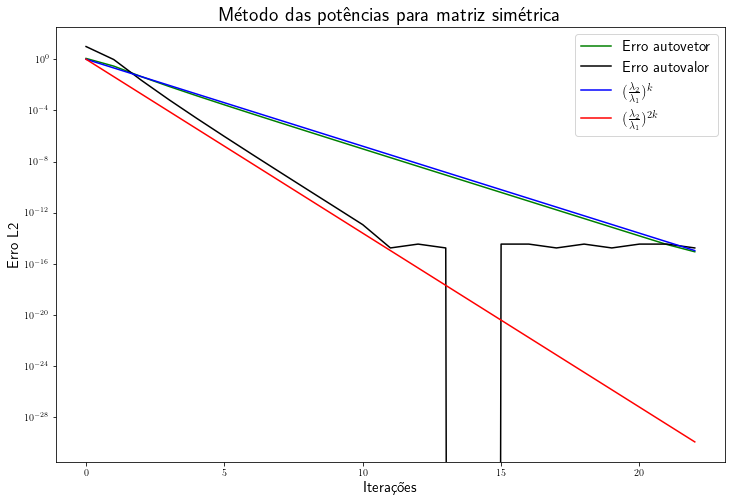

In [12]:
M1 = MetodoDasPotencias(A1, 70, 1e-15)
M1.calcula_aproximacao()
M1.gera_grafico_comparativo("Método das potências para matriz simétrica", True, "Matriz 1")

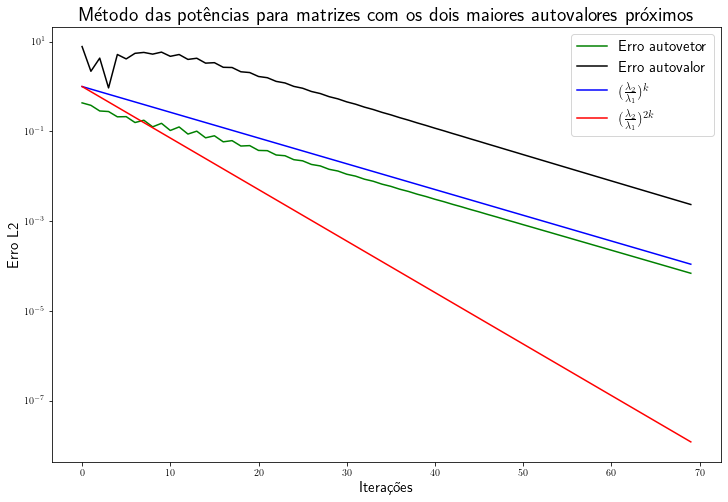

In [13]:
M21 = MetodoDasPotencias(A21, 70, 1e-15)
M21.calcula_aproximacao()
M21.gera_grafico_comparativo("Método das potências para matrizes com os dois maiores autovalores próximos", True,"Matriz 2-1")

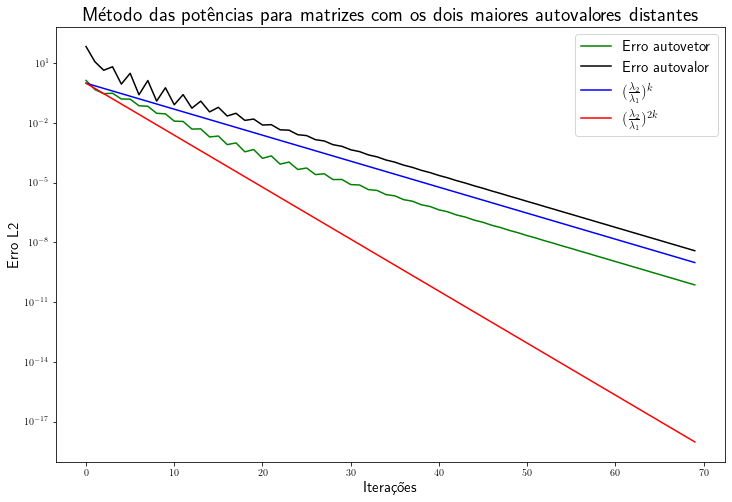

In [14]:
M22 = MetodoDasPotencias(A22, 70, 1e-15)
M22.calcula_aproximacao()
M22.gera_grafico_comparativo("Método das potências para matrizes com os dois maiores autovalores distantes", True,"Matriz 2-2")